In [1]:
library("here")
library(devtools)
library(Seurat)

load_all('/home/jpm73279/Socrates')

here() starts at /home/jpm73279/Mendieta_et_al_comparative_single_cell

Loading required package: usethis

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

ℹ Loading Socrates

Loading required package: cicero

Loading required package: monocle

Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, 

In [5]:
# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/"

sb_leaf_rep_1 <- paste0(analysis_path, "Sorghum_leaf.sciATAC_rep1.unique.tn5.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"Sbicolorv5.1.primaryTrs.gff3")
chr <- paste0(reference_genome_path,"Sorghum_bicolor_var_BTx623.chrom.size")
pre <- "Sb.Leaf_rep1"



#Load Object
sb_leaf_rep_1 <- loadBEDandGenomeData(sb_leaf_rep_1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/Sorghum_leaf.sciATAC_rep1.unique.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.primaryTrs.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sorghum_bicolor_var_BTx623.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data



In [6]:
sb_leaf_rep_1.no_organelle <- countRemoveOrganelle(sb_leaf_rep_1, 
                                             org_scaffolds = c("Pt", "Mt"), 
                                             remove_reads = TRUE)

No organeller reads identified ...

Are you sure the given names were correct?



In [11]:
# call ACRs
sb_temp_dir <- paste0(analysis_path, "sb_peaks.tmp")
zea_m.EarLarge.obj.acrs <- callACRs(sb_leaf_rep_1.no_organelle, genomesize=1.8e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/sb_peaks.tmp' already exists"


In [12]:
sb_leaf_rep_1.meta <- buildMetaData(zea_m.EarLarge.obj.acrs,
                                     tss.window=2000,
                                     verbose=TRUE,
                                     organelle_scaffolds= c("Pt", "Mt"))

 - counting Tn5 sites per barcode ...

 - removing organelle scaffolds from annotation ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...



Making Dotplot



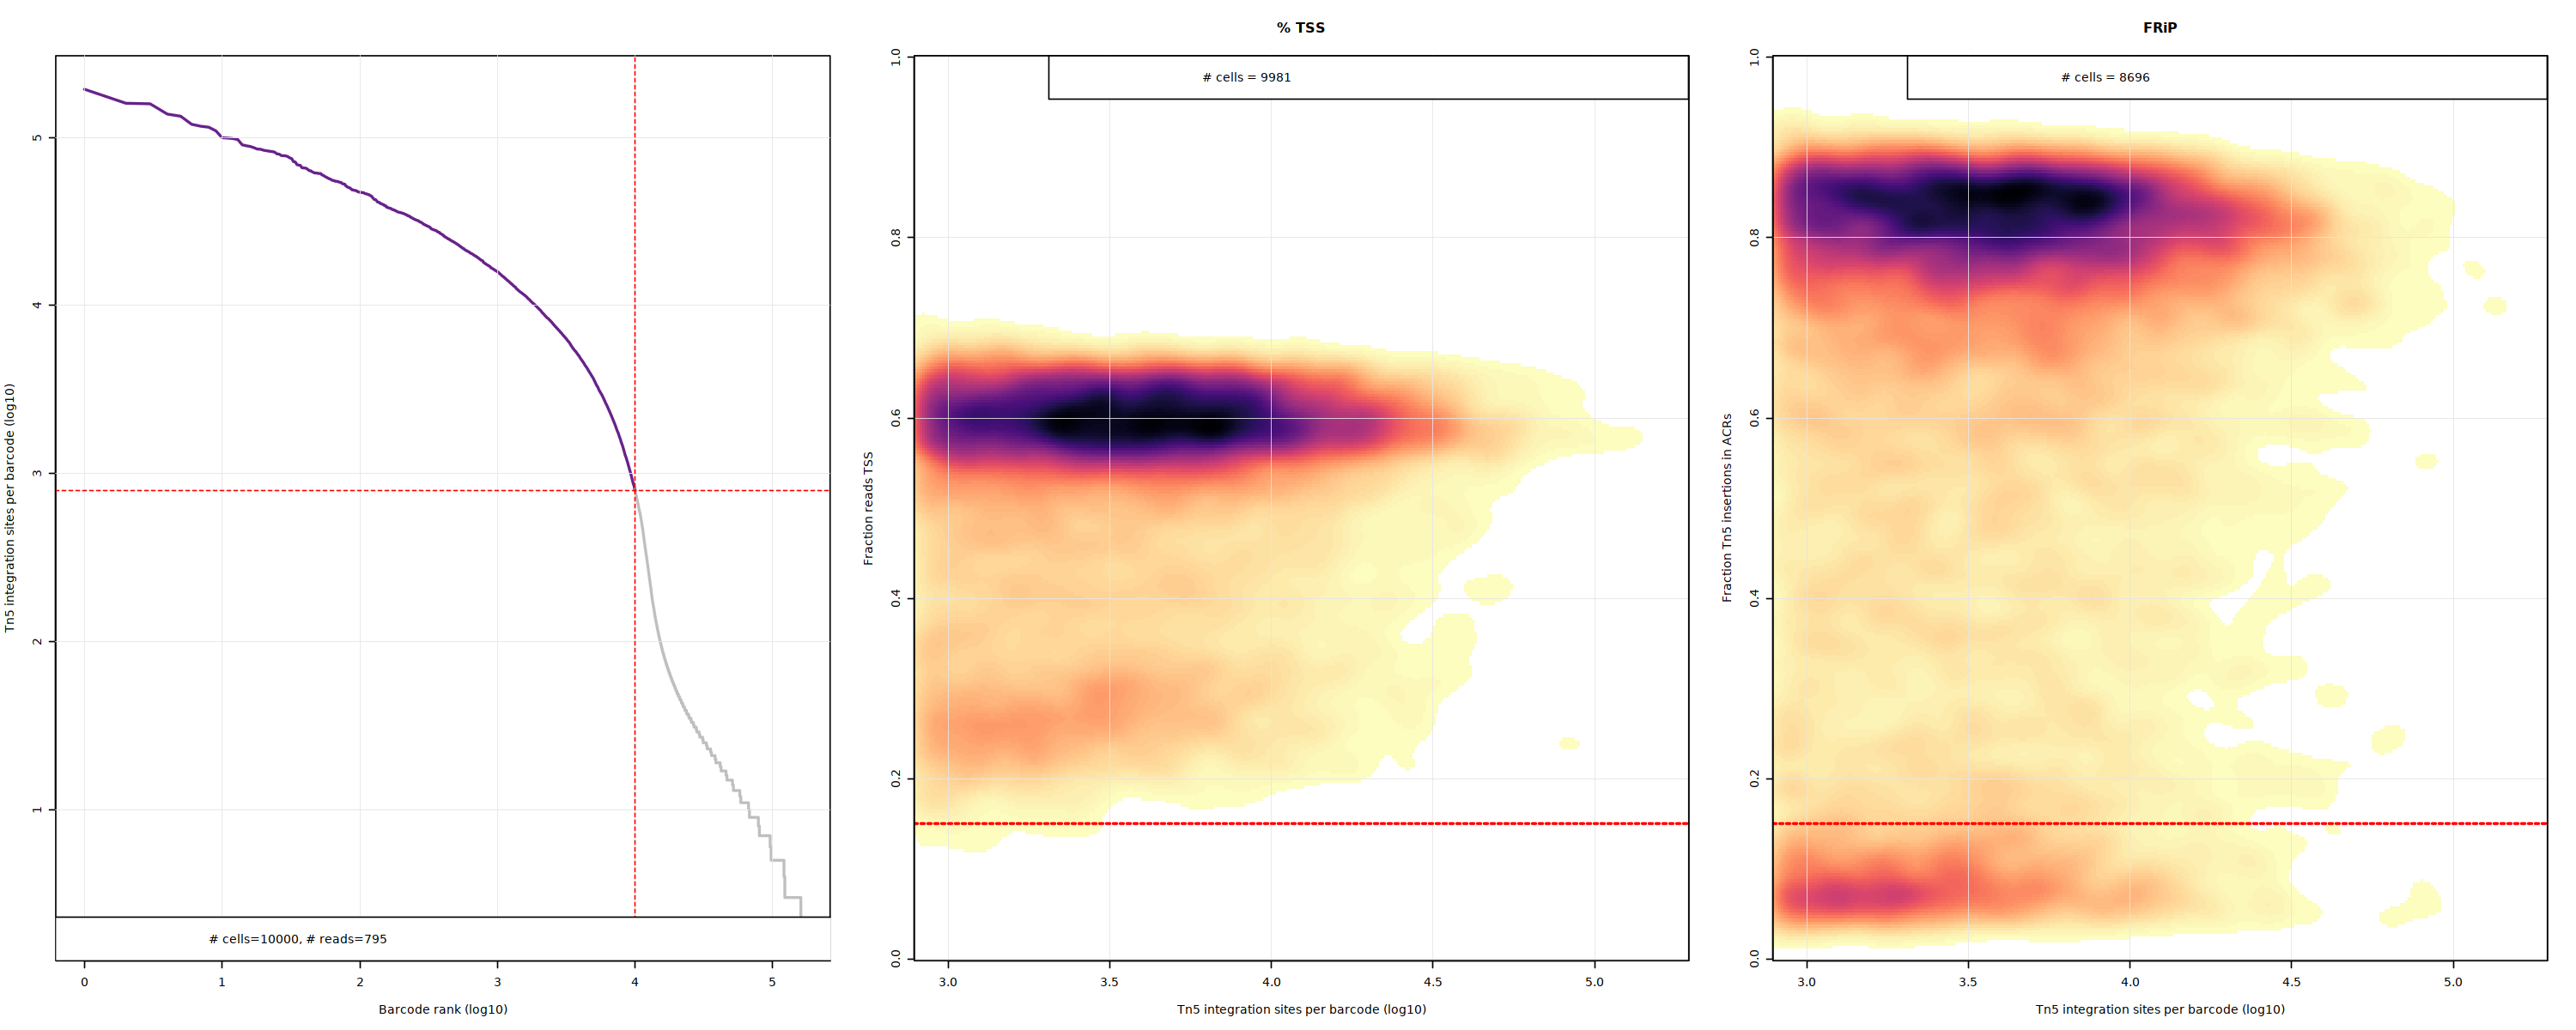

In [14]:
library(repr)

options(repr.plot.width=25, repr.plot.height=10)
sb_leaf_rep_1.meta_file <- findCells(sb_leaf_rep_1.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=10000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=0.15,
                                        filt.org = FALSE,
                                        prefix=NULL)


In [15]:
# generate sparse matrix
sb_leaf_rep_1.meta_file.filtered <- generateMatrix(sb_leaf_rep_1.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

In [17]:
pre <- "Sb.Leaf_rep1"
# convert to Socrates format for downstream analysis.-
sb_leaf_rep_1.filtered.sparse <- convertSparseData(sb_leaf_rep_1.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_1.save  <- paste0(analysis_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_1.save  <- paste0(analysis_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(sb_leaf_rep_1.meta_file.filtered, file=sb.obj.leaf_rep_1.save)
saveRDS(sb_leaf_rep_1.filtered.sparse, file=sb.soc.leaf_rep_1.save)

 - converting triplet format to sparseMatrix



## Replicate 2

In [18]:
# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/"

sb_leaf_rep_2 <- paste0(analysis_path, "Sorghum_leaf.sciATAC_rep2.unique.tn5.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"Sbicolorv5.1.primaryTrs.gff3")
chr <- paste0(reference_genome_path,"Sorghum_bicolor_var_BTx623.chrom.size")
pre <- "Sb.Leaf_rep2"



#Load Object
sb_leaf_rep_2 <- loadBEDandGenomeData(sb_leaf_rep_2, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/Sorghum_leaf.sciATAC_rep2.unique.tn5.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.primaryTrs.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sorghum_bicolor_var_BTx623.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data



In [19]:
sb_leaf_rep_2.no_organelle <- countRemoveOrganelle(sb_leaf_rep_2, 
                                             org_scaffolds = c("Pt", "Mt"), 
                                             remove_reads = TRUE)

No organeller reads identified ...

Are you sure the given names were correct?



In [20]:
# call ACRs
sb_temp_dir <- paste0(analysis_path, "sb_peaks.tmp")
sb_leaf_rep_2.no_organelle.acrs <- callACRs(sb_leaf_rep_2.no_organelle, genomesize=1.8e8,
                shift= -50,
                extsize=100,
                fdr=0.05,
                tempdir=sb_temp_dir,
                verbose=T)

 - running MACS2 on bulk BED file ...

Warning message in dir.create(mac2temp):
"'/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/sb_peaks.tmp' already exists"


In [21]:
sb_leaf_rep_2.meta <- buildMetaData(sb_leaf_rep_2.no_organelle.acrs,
                                     tss.window=2000,
                                     verbose=TRUE,
                                     organelle_scaffolds= c("Pt", "Mt"))

 - counting Tn5 sites per barcode ...

 - removing organelle scaffolds from annotation ...

 - counting Tn5 sites at TSSs per barcode ...

 - counting Tn5 sites within ACRs per barcode ...

 - finalizing meta data creation ...

   ~ returning metadata ...



Making Dotplot



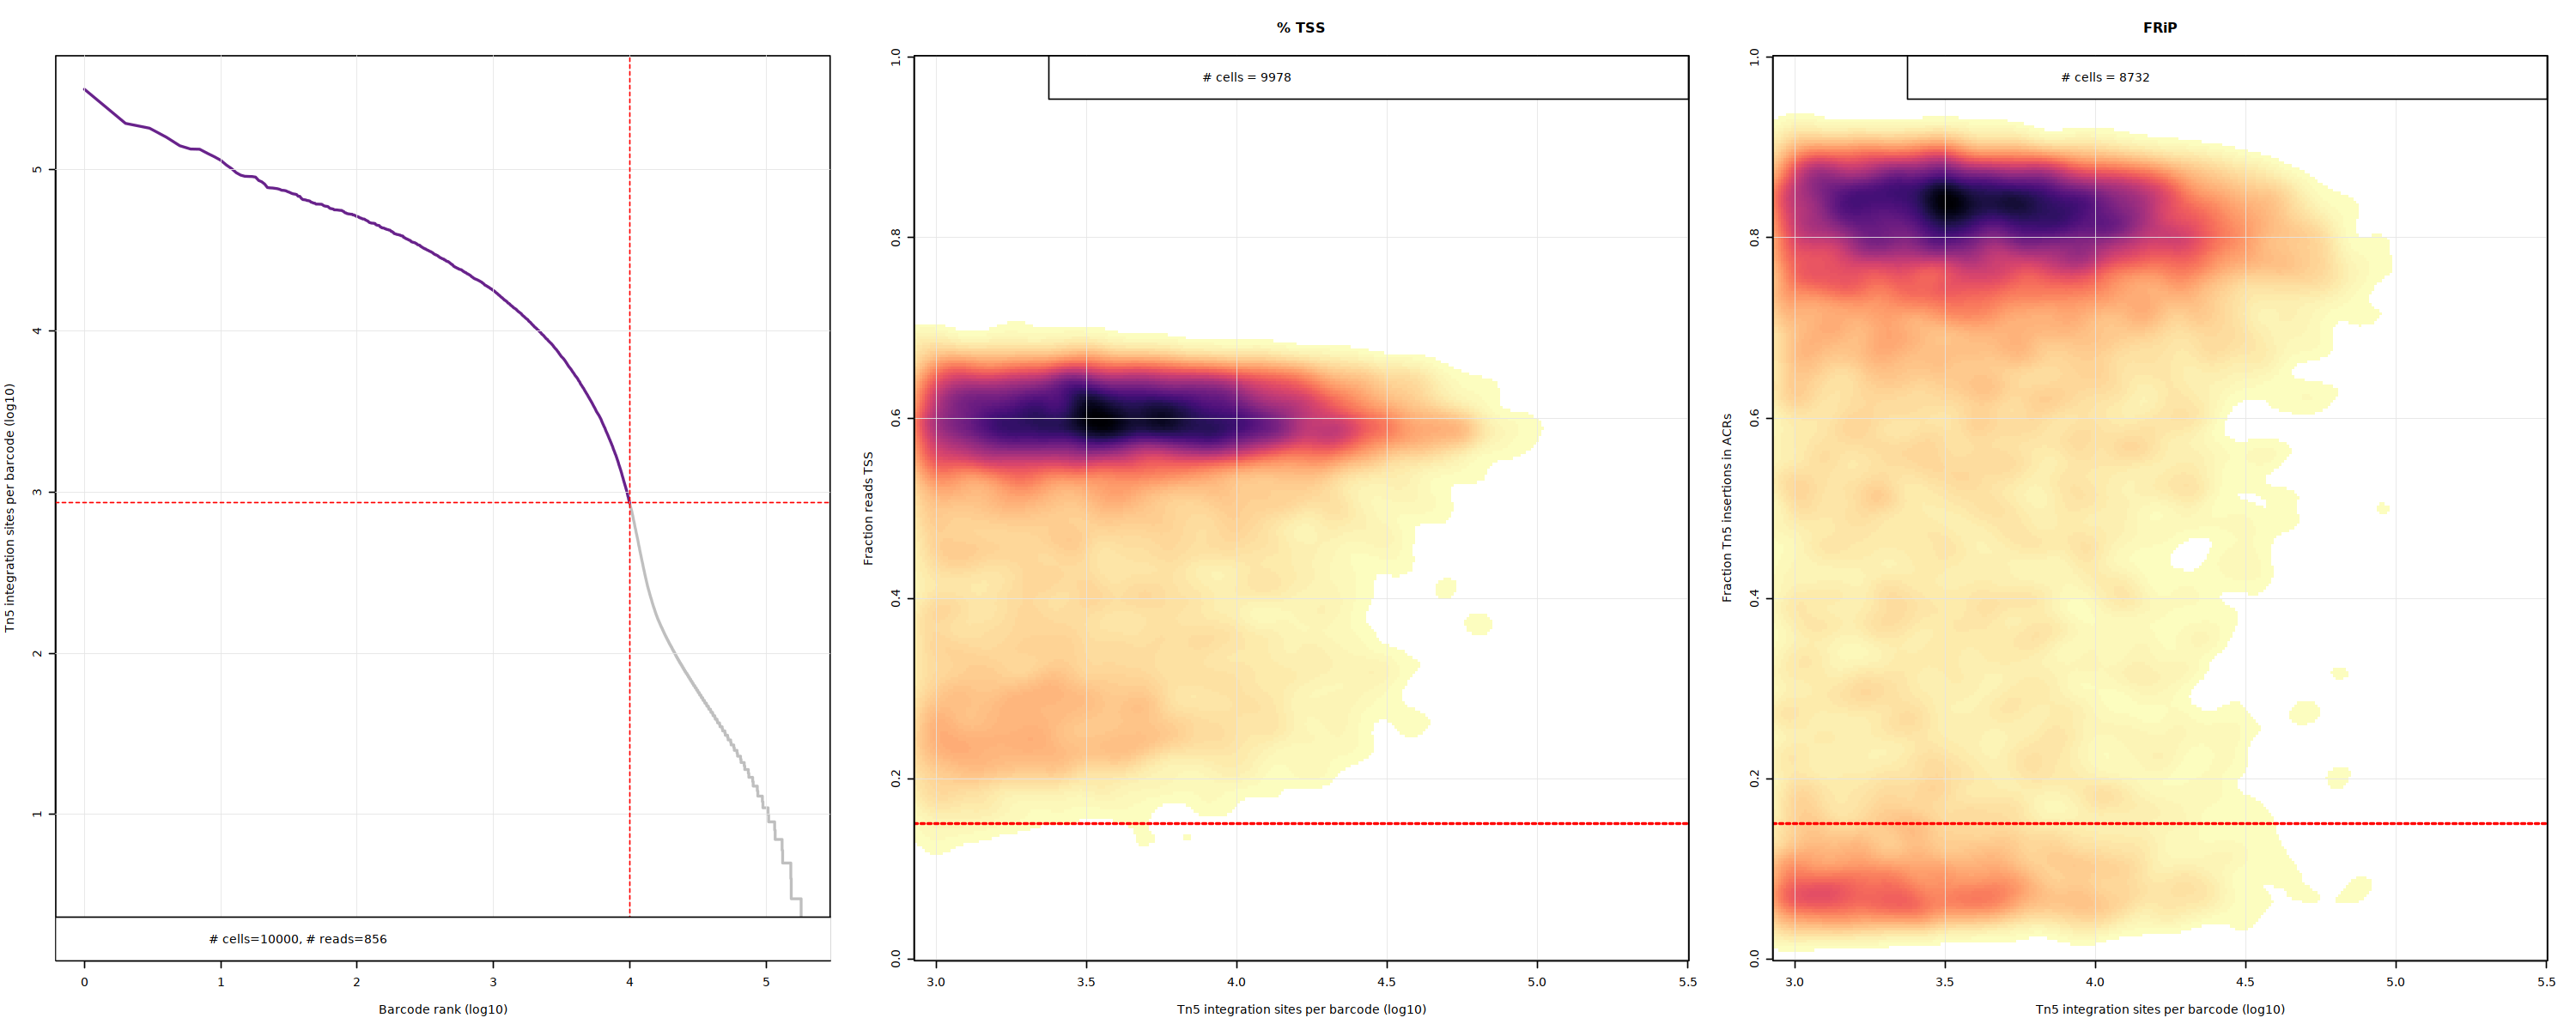

In [22]:
library(repr)

options(repr.plot.width=25, repr.plot.height=10)
sb_leaf_rep_2.meta_file <- findCells(sb_leaf_rep_2.meta,
                                        doplot=T,
                                        set.tn5.cutoff=500,
                                        max.cells=10000,
                                        min.tn5=500,
                                        filt.tss=TRUE,
                                        filt.frip=TRUE,
                                        #tss.z.thresh=3,
                                        tss.min.freq=.15,
                                        frip.min.freq=0.15,
                                        filt.org = FALSE,
                                        prefix=NULL)


In [23]:
# generate sparse matrix
sb_leaf_rep_2.meta_file.filtered <- generateMatrix(sb_leaf_rep_2.meta_file,
                            filtered=T,
                            windows=500,
                            peaks=F,
                            verbose=T)

#rm(zea_m.Crown_root_1.obj.filtered, zea_m.Crown_root_1.obj.meta, zea_m.Crown_root_1.obj.no_organelle)

In [24]:
pre <- "Sb.Leaf_rep2"
# convert to Socrates format for downstream analysis.-
sb_leaf_rep_2.filtered.sparse <- convertSparseData(sb_leaf_rep_2.meta_file.filtered,
                             verbose=T)

#pre <- "Zea_mays_tis_crown_root_rep_1"
sb.obj.leaf_rep_2.save  <- paste0(analysis_path,"QC_output/",pre, "_QC_obj.rds")
sb.soc.leaf_rep_2.save  <- paste0(analysis_path,"QC_output/",pre, "_QC_soc_obj.rds")


# save QC object
saveRDS(sb_leaf_rep_2.meta_file.filtered, file=sb.obj.leaf_rep_2.save)
saveRDS(sb_leaf_rep_2.filtered.sparse, file=sb.soc.leaf_rep_2.save)

 - converting triplet format to sparseMatrix



# Take QC Metrics for Excel

In [1]:
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/"


sb_replicate_1 <- readRDS("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output/Sb.Leaf_rep1_QC_soc_obj.rds")
sb_replicate_2 <- readRDS("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output/Sb.Leaf_rep2_QC_soc_obj.rds")

In [15]:
mean(sb_replicate_1$meta$total)
mean(sb_replicate_2$meta$total)

[1] 7198.828

[1] 7796.669

In [2]:
mean(sb_replicate_1$meta$tss)
mean(sb_replicate_2$meta$tss)

[1] 4079.982

[1] 4428.76

In [3]:
mean(sb_replicate_1$meta$acrs)
mean(sb_replicate_2$meta$acrs)

[1] 5165.285

[1] 5604.85

In [4]:
mean(sb_replicate_1$meta$nSites)
mean(sb_replicate_2$meta$nSites)

[1] 3802.73

[1] 4100.407